<a href="https://colab.research.google.com/github/anagha102/Predict-if-animal-is-mucca-or-pecora/blob/main/Predict_if_animal_is_mucca_or_pecora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agenda:**
1. About the Dataset

2. Objective

3. Loading Libraries

4. Loading Data

5. Splitting Data into Train and Test Set

6. Train the model :

      A. Define the model. B. Compile the model. C. Fit the model. D. Evaluate the model 

7. Trying and doing same tasks with another model

8. Conclusion


## **About the Dataset**
Dataset consists of 1200 medium quality animal images belonging to 2 categories: mucca (cow) and pecora (sheep). All the images have been collected from "google images" and have been checked by humans. 

## **Objective**
To build deep learning model that will help us to recognize the animal in images.

In [4]:
# Helper libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard 
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras import optimizers

## **Loading Data**

In [1]:
!git clone 'https://github.com/dphi-official/Datasets/'

Cloning into 'Datasets'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 10164 (delta 3), reused 14 (delta 2), pack-reused 10147
Receiving objects: 100% (10164/10164), 529.48 MiB | 34.62 MiB/s, done.
Resolving deltas: 100% (193/193), done.
Checking out files: 100% (9415/9415), done.


In [2]:
# To unzip train_beg.zip
!unzip /content/Datasets/animal_data/train_beg.zip 

Archive:  /content/Datasets/animal_data/train_beg.zip
   creating: train_beg/
  inflating: train_beg/Image_1.jpg   
  inflating: train_beg/Image_10.jpg  
  inflating: train_beg/Image_100.jpg  
  inflating: train_beg/Image_1000.jpg  
  inflating: train_beg/Image_1001.jpg  
  inflating: train_beg/Image_1002.jpg  
  inflating: train_beg/Image_1003.jpg  
  inflating: train_beg/Image_1004.jpg  
  inflating: train_beg/Image_1005.jpg  
  inflating: train_beg/Image_1006.jpg  
  inflating: train_beg/Image_1007.jpg  
  inflating: train_beg/Image_1008.jpg  
  inflating: train_beg/Image_1009.jpg  
  inflating: train_beg/Image_101.jpg  
  inflating: train_beg/Image_1010.jpg  
  inflating: train_beg/Image_1011.jpg  
  inflating: train_beg/Image_1012.jpg  
  inflating: train_beg/Image_1013.jpg  
  inflating: train_beg/Image_1014.jpg  
  inflating: train_beg/Image_1015.jpg  
  inflating: train_beg/Image_1016.jpg  
  inflating: train_beg/Image_1017.jpg  
  inflating: train_beg/Image_1018.jpg  
  inflat

In [27]:
# accessing the given csv file
labels = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv')
labels.head()   # this file contains file name and corresponding labels

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [28]:
image_paths = ['/content/train_beg/' + fname for fname in labels['filename']]   # will get list of list of image id and image path

In [29]:
# Confirm if number of images is same as number of labels given
if len(labels) == len(image_paths):
    print('Number of labels i.e. ', len(labels), 'matches the number of filenames i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filenames')

Number of labels i.e.  1200 matches the number of filenames i.e.  1200


In [30]:
dataset = pd.DataFrame({'filename': labels['filename'], 'filepath': image_paths, 'animal_type': labels['animal_type']})
dataset.head()

,filename,filepath,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca


In [31]:
dataset['animal_type'].value_counts()

mucca     600
pecora    600
Name: animal_type, dtype: int64

In [32]:
print(dataset.iloc[999])

filename                          Image_1000.jpg
filepath       /content/train_beg/Image_1000.jpg
animal_type                               pecora
Name: 999, dtype: object


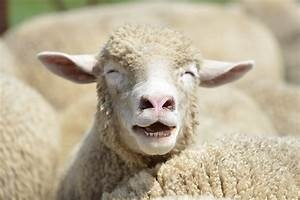

In [33]:
# For colored Image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread ('/content/train_beg/Image_999.jpg',1) 
cv2_imshow(img)

In [34]:
data = []    # initialize a list to store, each image's pixel values 
labels = []   # initialize a list to store each image's labels i.e. animal type
for i in range(len(dataset)):
  image_arr = cv2.imread(dataset['filepath'][i])     # for each i starting from 0, convert the ith image to array of pixels
  data.append(image_arr)
  # We also need to convert the categorical values i.e. 'mucca' and 'pecora' to numerical
  # Using conditional statement, we can do it here only. if mucca then 0, if pecora then 1
  if dataset['animal_type'][i] == 'mucca':           # if respective image's label is mucca
    labels.append(0)
  else:               # since there are only two type of animals, if the animal is not mucca, it will be pecora
    labels.append(1)     

In [35]:
data=np.array(data).astype(np.float32)    #converting to array
print(type(data))
labels=np.array(labels).astype(np.float32)
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [36]:
X=data
y=labels

## **Splitting the data into train and test**

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
X_train_scaled = X_train/255     #normalizing data
X_test_scaled = X_test/255

## **Tensor Board Config**

In [40]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystopping_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True)

In [41]:
input_shape = (200, 300, 3)
batch_size = 32
num_classes = 2
epochs = 20

**Model 1: Multi Layer Perceptron**

In [42]:
# Model 
model = Sequential()
model.add(Flatten(input_shape = input_shape))
model.add(Dense(1024, activation='relu'))   
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 180000)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              184321024 
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 184,911,617
Trainable params: 184,911,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# We compile the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer = optimizer , metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=epochs, batch_size= batch_size, verbose=1, callbacks= [tensorboard_callback])

Epoch 1/20
30/30 [==============================] - 5s 104ms/step - loss: 171.8274 - accuracy: 0.5183 - val_loss: 7.7923 - val_accuracy: 0.5417
Epoch 2/20
30/30 [==============================] - 3s 91ms/step - loss: 8.6786 - accuracy: 0.4998 - val_loss: 7.8893 - val_accuracy: 0.4583
Epoch 3/20
30/30 [==============================] - 3s 91ms/step - loss: 3.1914 - accuracy: 0.5099 - val_loss: 0.7023 - val_accuracy: 0.5375
Epoch 4/20
30/30 [==============================] - 3s 91ms/step - loss: 0.6985 - accuracy: 0.5151 - val_loss: 1.0517 - val_accuracy: 0.5417
Epoch 5/20
30/30 [==============================] - 3s 90ms/step - loss: 0.7830 - accuracy: 0.5167 - val_loss: 0.6949 - val_accuracy: 0.4583
Epoch 6/20
30/30 [==============================] - 3s 91ms/step - loss: 0.7151 - accuracy: 0.5283 - val_loss: 0.6942 - val_accuracy: 0.4542
Epoch 7/20
30/30 [==============================] - 3s 90ms/step - loss: 0.6930 - accuracy: 0.5206 - val_loss: 0.6945 - val_accuracy: 0.4542
Epoch 8/20

In [ ]:
model.evaluate(X_test_scaled, y_test)

8/8 [==============================] - 0s 14ms/step - loss: 0.6954 - accuracy: 0.4583


[0.695431113243103, 0.4583333432674408]

**Conclusion:**
Train Accuracy: 48.74%
Test Accuracy: 45.83%
As accuracy is quiet low,We will try another model.

**Model 2: CNN Model**

In [ ]:
!rm -rf ./logs/ 

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 64)       9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 35, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 103040)           

In [ ]:
# Fit the model
model.fit(X_train,y_train, epochs = epochs, batch_size = batch_size,validation_data = (X_test, y_test),callbacks=[tensorboard_callback])

Epoch 1/20
30/30 [==============================] - 8s 83ms/step - loss: 2187.7855 - accuracy: 0.5075 - val_loss: 0.9436 - val_accuracy: 0.5458
Epoch 2/20
30/30 [==============================] - 2s 73ms/step - loss: 0.6416 - accuracy: 0.7056 - val_loss: 0.7614 - val_accuracy: 0.6833
Epoch 3/20
30/30 [==============================] - 2s 74ms/step - loss: 11.3597 - accuracy: 0.8395 - val_loss: 0.7106 - val_accuracy: 0.6500
Epoch 4/20
30/30 [==============================] - 2s 74ms/step - loss: 1.1026 - accuracy: 0.9067 - val_loss: 0.7345 - val_accuracy: 0.6208
Epoch 5/20
30/30 [==============================] - 2s 73ms/step - loss: 12.3478 - accuracy: 0.8318 - val_loss: 0.8205 - val_accuracy: 0.6542
Epoch 6/20
30/30 [==============================] - 2s 72ms/step - loss: 13.2707 - accuracy: 0.7669 - val_loss: 0.8043 - val_accuracy: 0.6042
Epoch 7/20
30/30 [==============================] - 2s 74ms/step - loss: 1.6012 - accuracy: 0.7135 - val_loss: 1.1251 - val_accuracy: 0.6958
Epoch 8

In [ ]:
model.evaluate(X_test_scaled, y_test)

8/8 [==============================] - 0s 21ms/step - loss: 0.6638 - accuracy: 0.7000


[0.6638404130935669, 0.699999988079071]

**Conclusion:**
Train Accuracy: 100%
Test Accuracy: 70.83%
Model is overfitting, we can do it better!

**Data Augmentation**

To combat overfitting, we need more training data, for this let's try data augmentation



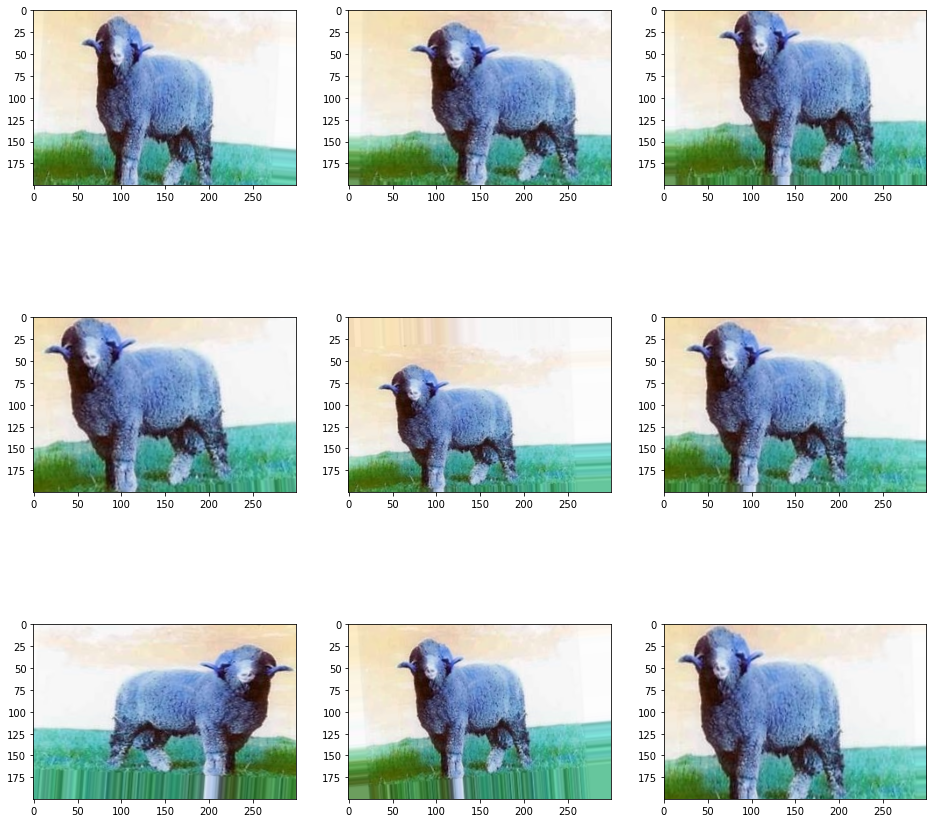

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
example_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, rotation_range=5,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

samples = expand_dims(img_to_array(image_arr), 0)
it = example_datagen.flow(samples, batch_size=1)

f, axs = plt.subplots(3,3,figsize=(16,16))
# generate samples and plot
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('float32')
  # plot raw pixel data
  plt.imshow(image)

# show the figure
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, rotation_range=5,width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

**Model 2.1: CNN by data augumentation**

In [ ]:
!rm -rf ./logs/ 
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 147, 64)       9280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 35, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 33, 128)      

In [ ]:
model.fit(train_datagen.flow(X_train, y_train, batch_size=40), epochs = 20, steps_per_epoch= 24,validation_data = val_datagen.flow(X_test, y_test, batch_size = 25),validation_steps = 6,callbacks=[tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 13s 465ms/step - loss: 0.6941 - accuracy: 0.4997 - val_loss: 0.6783 - val_accuracy: 0.5733
Epoch 2/20
24/24 [==============================] - 11s 459ms/step - loss: 0.6698 - accuracy: 0.5881 - val_loss: 0.7544 - val_accuracy: 0.5333
Epoch 3/20
24/24 [==============================] - 11s 459ms/step - loss: 0.6419 - accuracy: 0.6294 - val_loss: 0.6148 - val_accuracy: 0.6600
Epoch 4/20
24/24 [==============================] - 11s 460ms/step - loss: 0.6262 - accuracy: 0.6614 - val_loss: 0.6108 - val_accuracy: 0.7267
Epoch 5/20
24/24 [==============================] - 11s 460ms/step - loss: 0.6297 - accuracy: 0.6459 - val_loss: 0.6016 - val_accuracy: 0.6400
Epoch 6/20
24/24 [==============================] - 11s 462ms/step - loss: 0.5965 - accuracy: 0.6885 - val_loss: 0.5872 - val_accuracy: 0.7133
Epoch 7/20
24/24 [==============================] - 11s 457ms/step - loss: 0.5905 - accuracy: 0.6826 - val_loss: 0.5970 - val_accuracy: 0.7333

In [ ]:
model.evaluate(X_test_scaled, y_test)

8/8 [==============================] - 0s 23ms/step - loss: 0.5285 - accuracy: 0.7417


[0.5285492539405823, 0.7416666746139526]

Conclusions:
Training accuracy: 75.44%
Testing accuracy: 76.67%
Even after data augumentation, we are not geting satisfying accuracy. So we will try another method. Before that let's save our model.

In [ ]:
model.save('CNN_data_augmentation.h5')

**Model 3: Transfer Learning**

In [ ]:
from tensorflow.keras.applications import Xception
from keras.models import Model
import keras

In [ ]:
Xc = Xception(include_top=False, weights='imagenet', input_shape=input_shape)

83689472/83683744 [==============================] - 0s 0us/step


In [ ]:
output = Xc.layers[-1].output
output = keras.layers.Flatten()(output)
Xc_model = Model(Xc.input, output)

In [ ]:
Xc_model.trainable = False
for layer in Xc_model.layers:
    layer.trainable = False

In [ ]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
train_features_Xc = get_bottleneck_features(Xc_model, X_train_scaled)
validation_features_Xc = get_bottleneck_features(Xc_model, X_test_scaled)

In [ ]:
print('Train Bottleneck Features:', train_features_Xc.shape,
      '\tValidation Bottleneck Features:', validation_features_Xc.shape)

Train Bottleneck Features: (960, 143360) 	Validation Bottleneck Features: (240, 143360)


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
!rm -rf ./logs/ 

input_shape = Xc_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
#model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               73400832  
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 73,664,001
Trainable params: 73,664,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_features_Xc,y_train, epochs = 20, batch_size = batch_size, validation_data=(validation_features_Xc, y_test),verbose = 1,callbacks=[tensorboard_callback, earlystopping_callback])

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 1.5667 - accuracy: 0.7540 - val_loss: 0.4276 - val_accuracy: 0.8417
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2039 - accuracy: 0.9298 - val_loss: 0.1619 - val_accuracy: 0.9333
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0656 - accuracy: 0.9784 - val_loss: 0.3843 - val_accuracy: 0.9125
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0457 - accuracy: 0.9839 - val_loss: 0.2346 - val_accuracy: 0.9333
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0557 - accuracy: 0.9802 - val_loss: 0.2627 - val_accuracy: 0.9292


In [ ]:
model.evaluate(validation_features_Xc, y_test)

8/8 [==============================] - 0s 9ms/step - loss: 0.1619 - accuracy: 0.9333


[0.1618684083223343, 0.9333333373069763]

**Conclusion:**

By transfer learning we get train accuracy: 98.02% and test accuracy: 92.92%. That's best accuracy we have.